In [48]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from numpy import mean
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_det_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

df_recipes = pd.read_csv('../dataset/recipes.csv')

In [49]:
add_col = ['carbohydrate_p','protein_p','fat_p']
map_to_col = ['carbohydrate','protein','fat']

# Protein - 4 calories per gram
# Fats - 9 calories per gram
# Carbs - 4 calories per gram
macronutrient_basics = [4,4,9]

for i in range(3):
    df_recipes[add_col[i]] = ((df_recipes[map_to_col[i]]*macronutrient_basics[i]/df_recipes['calories'])*100)

In [50]:
df_recipes

,recipe_id,recipe_name,calories,carbohydrate,fat,protein,carbohydrate_p,protein_p,fat_p
0,45430986,Gluten-Free Rolls,177,31.06,4.62,3.00,70.192090,6.779661,23.491525
1,42818205,French Fries,203,39.29,3.74,4.75,77.418719,9.359606,16.581281
2,42384638,Chicken Stir Fry,306,39.22,8.51,20.00,51.267974,26.143791,25.029412
3,42288128,Black Bean Salsa,110,13.69,4.77,4.59,49.781818,16.690909,39.027273
4,8629075,Taco Soup,192,18.09,6.88,12.70,37.687500,26.458333,32.250000
...,...,...,...,...,...,...,...,...,...
3360,70,Asian Coleslaw,446,45.59,24.78,16.14,40.887892,14.475336,50.004484
3361,63,Stir-Fried Beef and Potatoes,336,22.04,16.10,25.12,26.238095,29.904762,43.125000
3362,52,Beef and Bean Chilli,286,14.94,14.66,23.65,20.895105,33.076923,46.132867
3363,47,Mexican Pozole,227,11.72,10.94,19.60,20.651982,34.537445,43.374449


In [51]:
"""
Label Keto
"""
# 1 = Keto Diet 
# 0 = not Keto Diet 
df_recipes['label_keto'] = 0
c = df_recipes['carbohydrate_p']
p = df_recipes['protein_p']
f = df_recipes['fat_p']
label = df_recipes['label_keto']
for i in range(df_recipes.shape[0]):
#     if  f.loc[i] >= 70 and c.loc[i] <= 10:
#         label.loc[i] = 1
    if  f.loc[i] >= 15 and  f.loc[i] <= 30 and p.loc[i] >= 35:
            label.loc[i] = 1

df_recipes_keto = df_recipes[['recipe_id','label_keto']]

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
len(df_recipes_keto[df_recipes_keto['label_keto'] ==1])

263

In [53]:
df_recipe_with_ingredient =  pd.read_csv('../dataset/recipe_with_ingredient.csv')
df_recipe_with_ingredient.rename({'Unnamed: 0':'recipe_id'}, axis='columns', inplace = True)

join_recipe_w_label = df_recipe_with_ingredient.set_index('recipe_id').join(df_recipes_keto.set_index('recipe_id'))
features = [x for x in join_recipe_w_label.columns[0:-1]]

In [54]:
p_sample = join_recipe_w_label[join_recipe_w_label['label_keto'] == 1]
n_sample = join_recipe_w_label[join_recipe_w_label.label_keto == 0]
n_sample_rand = n_sample.sample(n =round(1.16*len(p_sample)))
X = pd.concat([p_sample, n_sample_rand])
y =  X[['label_keto']]
X_ = X[features]
x_train, x_test, y_train, y_test = train_test_split(X_,y, test_size=0.15,random_state=0)

# print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
# % Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

In [55]:
print('Before feature selection:')
SupportVectorClassModel = SVC()
SupportVectorClassModel.fit(x_train,y_train)
y_pred = SupportVectorClassModel.predict(x_test)
# accuracy = accuracy_score(y_test,y_pred)*100
print('SVM:\n',metrics.classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test, y_pred))

# example of evaluating a decision tree with random undersampling
RandomForestClassifierModel = RandomForestClassifier()
# rf = RandomForestClassifier(n_estimators = 180, max_depth=16, min_samples_split=16, random_state=0)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
# accuracy = accuracy_score(y_test,y_pred)*100
print('RF:\n',metrics.classification_report(y_test,y_pred_rf))
print(balanced_accuracy_score(y_test, y_pred_rf))
feature_impotantce_list= rf.feature_importances_

# logistic regression 
# lr = LogisticRegression(max_iter =200, warm_start = True, random_state = 0)
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
# accuracy = accuracy_score(y_test,y_pred)*100
print('LR:\n',metrics.classification_report(y_test,y_pred_lr))

# Naive Bayes 
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
# accuracy = accuracy_score(y_test,y_pred)*100
print('NB:\n',metrics.classification_report(y_test,y_pred_nb))

Before feature selection:


/Users/alice/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVM:
               precision    recall  f1-score   support

           0       0.62      0.87      0.73        46
           1       0.73      0.40      0.52        40

    accuracy                           0.65        86
   macro avg       0.68      0.63      0.62        86
weighted avg       0.67      0.65      0.63        86

0.6347826086956522


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


RF:
               precision    recall  f1-score   support

           0       0.64      0.91      0.75        46
           1       0.80      0.40      0.53        40

    accuracy                           0.67        86
   macro avg       0.72      0.66      0.64        86
weighted avg       0.71      0.67      0.65        86

0.6565217391304348
LR:
               precision    recall  f1-score   support

           0       0.65      0.80      0.72        46
           1       0.69      0.50      0.58        40

    accuracy                           0.66        86
   macro avg       0.67      0.65      0.65        86
weighted avg       0.67      0.66      0.65        86

NB:
               precision    recall  f1-score   support

           0       0.57      0.26      0.36        46
           1       0.48      0.78      0.59        40

    accuracy                           0.50        86
   macro avg       0.52      0.52      0.47        86
weighted avg       0.53      0.50      0

/Users/alice/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/alice/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [47]:
print('SVM:\n',metrics.classification_report(y_train,SupportVectorClassModel.predict(x_train)))
print('RF:\n',metrics.classification_report(y_train,rf.predict(x_train)))
print('LR:\n',metrics.classification_report(y_train,lr.predict(x_train)))


SVM:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       259
           1       0.98      0.92      0.95       223

    accuracy                           0.95       482
   macro avg       0.96      0.95      0.95       482
weighted avg       0.96      0.95      0.95       482

RF:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       259
           1       0.95      0.67      0.78       223

    accuracy                           0.83       482
   macro avg       0.86      0.82      0.82       482
weighted avg       0.85      0.83      0.82       482

LR:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       259
           1       0.96      0.98      0.97       223

    accuracy                           0.98       482
   macro avg       0.97      0.98      0.97       482
weighted avg       0.98      0.98      0.98       482



/Users/alice/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/alice/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/alice/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args

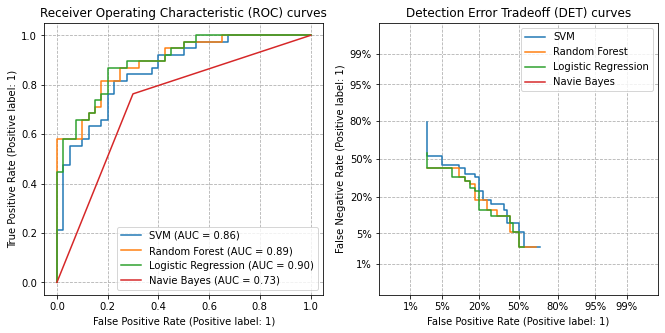

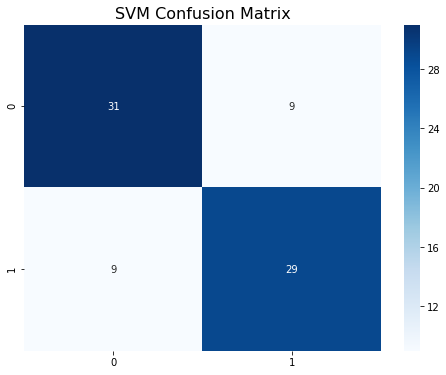

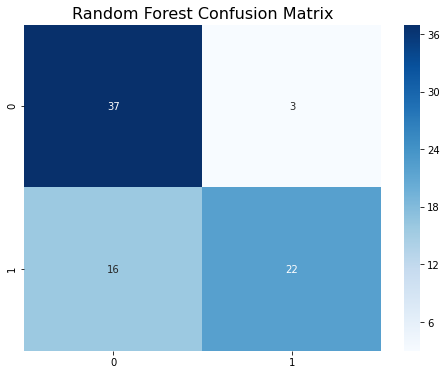

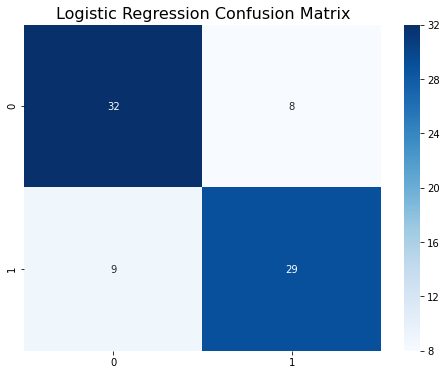

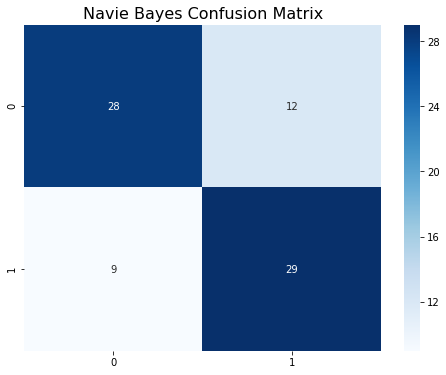

In [9]:
N_SAMPLES = 1000

classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators = 180, max_depth=16, min_samples_split=16, random_state=0),
    "Logistic Regression": LogisticRegression(random_state = 0),
    "Navie Bayes": GaussianNB()
}

# X, y = make_classification(
#     n_samples=N_SAMPLES, n_features=2, n_redundant=0, n_informative=2,
#     random_state=1, n_clusters_per_class=1)

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=.4, random_state=0)

# prepare plots
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)

    plot_roc_curve(clf, x_test, y_test, ax=ax_roc, name=name)
    plot_det_curve(clf, x_test, y_test, ax=ax_det, name=name)

ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

for name, clf in classifiers.items():
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.title(f'{name} Confusion Matrix', size=16)
    sns.heatmap(cm, annot=True, cmap='Blues');

plt.show()

In [10]:
# feature selection
important_feature = []
for i, num in enumerate(feature_impotantce_list):
    if num >= 0.0001:
        important_feature.append(i)
important_feature_convert = [features[i] for i in important_feature ]
len(important_feature)

584

In [ ]:
# transoform
X_fs = X[important_feature_convert]
y =  X[['label_keto']]
x_train, x_test, y_train, y_test = train_test_split(X_fs,y, test_size=0.25, random_state=42)
print('After feature selection:\n\n')

# Retrain
SupportVectorClassModel = SVC()
SupportVectorClassModel.fit(x_train,y_train)
y_pred = SupportVectorClassModel.predict(x_test)
# accuracy = accuracy_score(y_test,y_pred)*100
print('SVM:\n',metrics.classification_report(y_test,y_pred))

rf = RandomForestClassifier(n_estimators = 160, max_depth=12, min_samples_split=26, random_state=0)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
# accuracy = accuracy_score(y_test,y_pred)*100
print('\n\nRF:\n',metrics.classification_report(y_test,y_pred_rf))
feature_impotantce_list= rf.feature_importances_

# logistic regression 
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
# accuracy = accuracy_score(y_test,y_pred)*100
print('LR:\n',metrics.classification_report(y_test,y_pred_lr))


# Naive Bayes 
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
# accuracy = accuracy_score(y_test,y_pred)*100
print('NB:\n',metrics.classification_report(y_test,y_pred_nb))

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_det_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
N_SAMPLES = 1000

classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators = 160, max_depth=12, min_samples_split=26, random_state=0),
    "Logistic Regression": LogisticRegression(random_state = 0),
    "Navie Bayes": GaussianNB()
}

# X, y = make_classification(
#     n_samples=N_SAMPLES, n_features=2, n_redundant=0, n_informative=2,
#     random_state=1, n_clusters_per_class=1)

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=.4, random_state=0)

# prepare plots
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)

    plot_roc_curve(clf, x_test, y_test, ax=ax_roc, name=name)
    plot_det_curve(clf, x_test, y_test, ax=ax_det, name=name)

ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for name, clf in classifiers.items():
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.title(f'{name} Confusion Matrix', size=16)
    sns.heatmap(cm, annot=True, cmap='Blues');

plt.show()